<h2>Уплотнение энергии в ДКП-2</h2>
Сгененрируем простой сигнал и сравним его Фурье-спектр и разложение по типу ДКП-2

In [1]:
import numpy as np
from scipy.fftpack import fft, dct
import matplotlib.pyplot as plt

In [2]:
def generate_signal(N, amplitude=0.9, w=np.pi/10, phase=0):
    n = np.arange(N)
    sig = (amplitude ** n) * np.cos(w * n + phase)
    return n, sig

In [3]:
N = 32
n, sig = generate_signal(N)

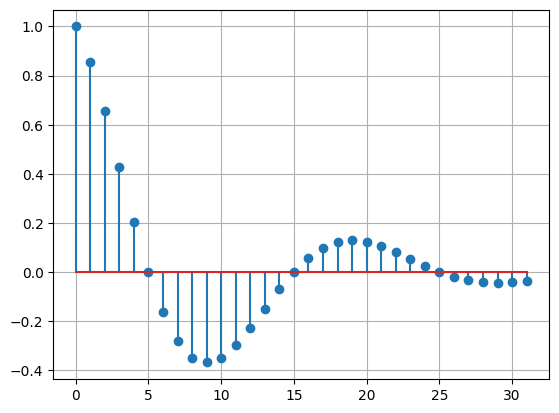

In [4]:
plt.stem(n, sig)
plt.grid()

In [5]:
sig_fft = np.abs(fft(sig))[:N//2 + 1]
sig_dct = np.abs(dct(sig, 2))

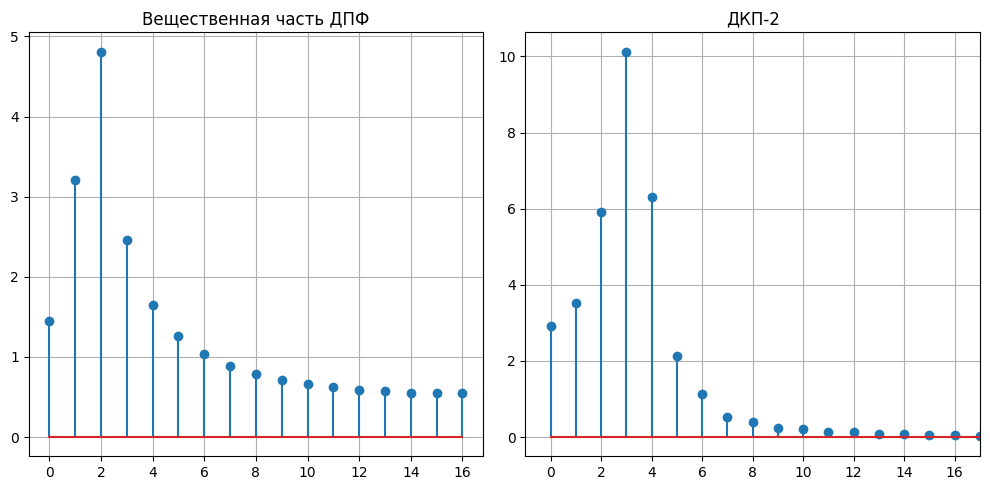

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.stem(sig_fft)
ax1.set_title("Вещественная часть ДПФ")
ax1.grid(True)

ax2.stem(sig_dct)
ax2.set_xlim(-1, 17)
ax2.set_title("ДКП-2")
ax2.grid(True)

plt.tight_layout()

Сравним распределение энергии в ДПФ и ДКП-2, а также как быстро аккумулируется энергия сигнала при увеличении количества элементов разложения:

In [7]:
fft_energy = sig_fft ** 2
dct_energy = sig_dct ** 2

In [8]:
M_values = range(20)

fft_energy_ratios = []
dct_energy_ratios = []

for M in M_values:
    fft_ratio = np.sum(fft_energy[:M]) / np.sum(fft_energy)
    fft_energy_ratios.append(fft_ratio)
    dct_ratio = np.sum(dct_energy[:M]) / np.sum(dct_energy)
    dct_energy_ratios.append(dct_ratio)

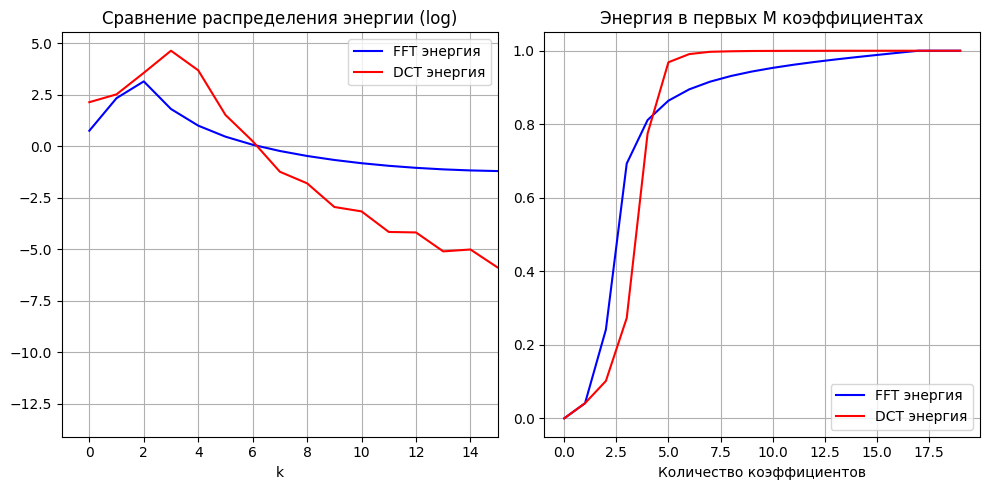

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(np.log(fft_energy), 'b-', label="FFT энергия")
ax1.plot(np.log(dct_energy), 'r-', label="DCT энергия")
ax1.set_xlim(-1, 15)
ax1.set_title("Срaвнение распределения энергии (log)")
ax1.set_xlabel("k")
ax1.legend()
ax1.grid(True)

ax2.plot(M_values, fft_energy_ratios, 'b-', label="FFT энергия")
ax2.plot(M_values, dct_energy_ratios, 'r-', label="DCT энергия")
ax2.set_title("Энергия в первых М коэффициентах")
ax2.set_xlabel("Количество коэффициентов")
ax2.legend()
ax2.grid(True)

plt.tight_layout()

Видно, что коэффициенты ДКП-2 сконцентрированы в нижних индексах, а значит ДКП-2 лучше подходит для сжатия данных (обнуление верхних индексов приведет к меньшей потере)